# 1. Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("fake_transactional_data_24.csv")

In [4]:
data.rename(columns={
    'from_totally_fake_account': 'from_account',
    'monopoly_money_amount': 'money_amount',
    'to_randomly_generated_account': 'to_account',
    'not_happened_yet_date': 'date'
}, inplace=True)
display(data.head())

,from_account,money_amount,to_account,date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025


In [5]:
from datetime import datetime

In [6]:
data["from_account"] = data["from_account"].astype(int)
data['to_account'] = data['to_account'].apply(lambda x: "PERSONAL_TRANSFER" if x.isdigit() else x)
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))

In [7]:
consumption = data.loc[:, ['from_account','money_amount', 'to_account', 'date']]
consumption = consumption[consumption["to_account"] != "PERSONAL_TRANSFER"].reset_index(drop=True)

In [8]:
type_set = set()
for item in consumption['to_account'].unique():
    type_set.add(item)

In [9]:
coffee_set = set()
for item in type_set:
    if "COFFEE" in item or "CAFE" in item:
        coffee_set.add(item)

In [10]:
bar_set = set()
bar_keywords = {"BAR", "PUB",'LOCAL_WATERING_HOLE'}
for item in type_set:
    for keywords in bar_keywords:
        if keywords in item:
            bar_set.add(item)

In [11]:
restaurant_set = set()
restaurant_keywords = {"RESTAURANT","KEBAB","SANDWICH","LUNCH","TAKEAWAY"}
for item in type_set:
    for keywords in restaurant_keywords:
        if keywords in item:
            restaurant_set.add(item)
restaurant_set = restaurant_set.union({'TURKEY_FARM','TO_BEAN_OR_NOT_TO_BEAN','STEAK_HOUSE','SEAFOOD_RESAURANT'})

In [12]:
food_retail_set = set()
for item in type_set:
    if "BUTCHER" in item:
        food_retail_set.add(item)
food_retail_set = food_retail_set.union({'LIQUOR_STORE','WINE_CELLAR','WHISKEY_SHOP','ROASTERIE',
                                         'GREENGROCER','TEA_SHOP','WE_HAVE_BEAN_WEIGHTING'})

In [13]:
toy_game_set = {"TOY_SHOP", "VIDEO_GAME_STORE", "CHILDRENDS_SHOP", "GAME_SHOP"}
clothing_set = {
    "FASHION_SHOP", "FASHIONABLE_SPORTSWARE_SHOP", "CLOTHES_SHOP", 
    "TRAINER_SHOP", "JEWLLERY_SHOP", "ACCESSORY_SHOP", "KIDS_CLOTHING_SHOP"
}
book_set = {
    "COMIC_BOOK_SHOP", "BOOKSHOP", "NERDY_BOOK_STORE", "LOCAL_BOOKSHOP", "SECOND_HAND_BOOKSHOP"
}
pet_set = {"PET_TOY_SHOP", "PET_SHOP"}
movie_TV_set = {"CINEMA",'STREAMING_SERVICE',"DVD_SHOP"}
electronic_set = {'ELECTRONICS_SHOP','HIPSTER_ELECTRONICS_SHOP','TECH_SHOP'}
sport_set = {'SPORT_SHOP', 'GYM','RUNNING_SHOP'}
supermarket_set = {"A_SUPERMARKET", "EXPRESS_SUPERMARKET", "LARGE_SUPERMARKET", "THE_SUPERMARKET", 'DEPARTMENT_STORE'}

non_other_set = coffee_set|bar_set|food_retail_set|toy_game_set|clothing_set|pet_set|movie_TV_set|electronic_set|sport_set|supermarket_set
other_set = {item for item in type_set if item not in non_other_set}

In [14]:
map_I_dict = dict()
for item in type_set:
    if item in coffee_set:
        map_I_dict[item] = "Coffee Shop"
    elif item in bar_set:
        map_I_dict[item] = "Bar"
    elif item in restaurant_set:
        map_I_dict[item] = "Restaurant"
    elif item in food_retail_set:
        map_I_dict[item] = "Food Retail"
    elif item in toy_game_set:
        map_I_dict[item] = "Toy and Game"
    elif item in clothing_set:
        map_I_dict[item] = "Clothing Store"
    elif item in book_set:
        map_I_dict[item] = "Bookstore"
    elif item in pet_set:
        map_I_dict[item] = "Pet"
    elif item in movie_TV_set:
        map_I_dict[item] = "Movie and TV"
    elif item in electronic_set:
        map_I_dict[item] = "Electronic Product"
    elif item in sport_set:
        map_I_dict[item] = "Sport"
    elif item in supermarket_set:
        map_I_dict[item] = "Supermarket"
    elif item in other_set:
        map_I_dict[item] = "Other"      

In [15]:
consumption["type_I"] = consumption["to_account"].apply(lambda x: map_I_dict[x])

In [16]:
consumption["type_I"].value_counts(normalize=True)

type_I
Bar                   0.368418
Coffee Shop           0.355923
Restaurant            0.121163
Supermarket           0.046196
Food Retail           0.035199
Movie and TV          0.022959
Bookstore             0.016925
Clothing Store        0.010561
Toy and Game          0.009377
Other                 0.007920
Pet                   0.002426
Sport                 0.002314
Electronic Product    0.000619
Name: proportion, dtype: float64

In [17]:
map_II_dict = {
    "Coffee Shop": "Food and Beverage",
    "Bar":"Food and Beverage",
    "Restaurant": "Food and Beverage",
    "Food Retail": "Food and Beverage",
    "Movie and TV": "Entertainment",
    "Bookstore": "Entertainment",
    "Toy and Game": "Entertainment",
    "Clothing Store": "Clothing",
    "Electronic Product": "Electronics",
    "Supermarket": "Supermarket",
    "Sport": "Sport",
    "Pet": "Pet",
    "Other": "Other"
}

In [18]:
consumption["type_II"] = consumption["type_I"].apply(lambda x: map_II_dict[x])

In [19]:
consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7615517 entries, 0 to 7615516
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   from_account  int32         
 1   money_amount  float64       
 2   to_account    object        
 3   date          datetime64[ns]
 4   type_I        object        
 5   type_II       object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 319.6+ MB


In [20]:
consumption['weekday'] = consumption['date'].apply(lambda x: x.strftime("%A"))

In [21]:
consumption['week_number'] = consumption['date'].apply(lambda x: int(x.strftime("%U")) + 1)

In [22]:
consumption['month'] = consumption['date'].apply(lambda x: x.strftime("%B"))

In [23]:
consumption.head()

,from_account,money_amount,to_account,date,type_I,type_II,weekday,week_number,month
0,10371,4.00,CINEMA,2025-01-01,Movie and TV,Entertainment,Wednesday,1,January
1,18555,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,Coffee Shop,Food and Beverage,Wednesday,1,January
2,18555,4.45,TOTALLY_A_REAL_COFFEE_SHOP,2025-01-01,Coffee Shop,Food and Beverage,Wednesday,1,January
3,18555,1.45,COFFEE_SHOP,2025-01-01,Coffee Shop,Food and Beverage,Wednesday,1,January
4,18555,5.00,CAFE,2025-01-01,Coffee Shop,Food and Beverage,Wednesday,1,January


In [24]:
consumption.to_csv('consumption.csv', index=False)

In [25]:
####################################

In [43]:
consumption = pd.read_csv('consumption.csv')

In [44]:
t

,from_account,money_amount,to_account,date,type_I,type_II,weekday,week_number,month
0,10371,4.00,CINEMA,2025-01-01,Movie and TV,Entertainment,Wednesday,1,January
1,18555,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,Coffee Shop,Food and Beverage,Wednesday,1,January
2,18555,4.45,TOTALLY_A_REAL_COFFEE_SHOP,2025-01-01,Coffee Shop,Food and Beverage,Wednesday,1,January
3,18555,1.45,COFFEE_SHOP,2025-01-01,Coffee Shop,Food and Beverage,Wednesday,1,January
4,18555,5.00,CAFE,2025-01-01,Coffee Shop,Food and Beverage,Wednesday,1,January
...,...,...,...,...,...,...,...,...,...
7615512,81404,1.80,TOTALLY_A_REAL_COFFEE_SHOP,2025-12-31,Coffee Shop,Food and Beverage,Wednesday,53,December
7615513,32185,2.65,COFFEE_SHOP,2025-12-31,Coffee Shop,Food and Beverage,Wednesday,53,December
7615514,32185,2.45,COFFEE_SHOP,2025-12-31,Coffee Shop,Food and Beverage,Wednesday,53,December
7615515,57569,14.00,WINE_BAR,2025-12-31,Bar,Food and Beverage,Wednesday,53,December


# 2. Weekday Analysis

In [27]:
consumption = pd.read_csv('consumption.csv')
consumption = consumption.drop(['from_account'],axis=1)

In [28]:
consumption.nunique()

money_amount    2484
to_account        79
date             364
type_I            13
type_II            8
weekday            7
week_number       53
month             12
dtype: int64

In [29]:
consumption_weekday = consumption.loc[:,['money_amount','to_account','type_I','type_II','weekday']]
consumption_weekday['weekday'] = consumption_weekday['weekday'].astype('category')
reorder_list = ['Sunday', 'Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday']
consumption_weekday['weekday'] = consumption_weekday['weekday'].cat.reorder_categories(reorder_list)

In [30]:
consumption_weekday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7615517 entries, 0 to 7615516
Data columns (total 5 columns):
 #   Column        Dtype   
---  ------        -----   
 0   money_amount  float64 
 1   to_account    object  
 2   type_I        object  
 3   type_II       object  
 4   weekday       category
dtypes: category(1), float64(1), object(3)
memory usage: 239.7+ MB


In [31]:
import datetime

In [32]:
start_date = datetime.date(2025, 1, 1)
end_date = datetime.date(2025, 12, 31)


day_count = {'Sunday': 0, 'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0}

current_date = start_date
while current_date <= end_date:
    day_of_week = current_date.strftime("%A")
    day_count[day_of_week] += 1
    current_date += datetime.timedelta(days=1)

In [33]:
consumption_weekday_type_II = consumption_weekday.groupby(['weekday', 'type_II'])['money_amount'].agg(['sum', 'mean', 'std','max', 'min', 'count']).sort_values(by='weekday')
consumption_weekday_type_II = consumption_weekday_type_II.reset_index()
consumption_weekday_type_II['weekday_count'] = consumption_weekday_type_II['weekday'].apply(lambda x: day_count[x])
consumption_weekday_type_II['average_transaction_volume'] = consumption_weekday_type_II['count']/consumption_weekday_type_II['weekday_count']
consumption_weekday_type_II['average_transaction_volume'] = consumption_weekday_type_II['average_transaction_volume'].astype(int)
consumption_weekday_type_II.drop(['weekday_count'],axis=1,inplace=True)
consumption_weekday_type_II.rename(columns={
    'sum':'total_transaction_amount',
    'mean':'average_transaction_amount',
    'std':'std_transaction_amount',
    'max':'max_transaction_amount',
    'min':'min_transaction_amount',
    'count':'total_transaction_volume'
},inplace=True)
consumption_weekday_type_II = consumption_weekday_type_II.set_index(['weekday','type_II'])
consumption_weekday_type_II = consumption_weekday_type_II.sort_index()
display(consumption_weekday_type_II)

total_transaction_amount  \
weekday   type_II                                       
Sunday    Clothing                         1064136.00   
          Electronics                       122740.00   
          Entertainment                     867749.13   
          Food and Beverage               15319493.86   
          Other                             394876.00   
          Pet                                53412.00   
          Sport                              99946.00   
          Supermarket                      3619892.35   
Monday    Clothing                         1049435.00   
          Electronics                       105237.00   
          Entertainment                     872459.26   
          Food and Beverage                3826113.75   
          Other                             388679.00   
          Pet                                51394.00   
          Sport                             115444.00   
          Supermarket                      3692024.26   
Tuesday   Clothing                         1022611.00   
          Electronics                       108076.00   
          Entertainment                     861605.26   
          Food and Beverage                3802887.02   
          Other                             372699.00   
          Pet                                52683.00   
          Sport                             116770.00   
          Supermarket                      3641942.13   
Wednesday Clothing                         1046572.00   
          Electronics                       104811.00   
          Entertainment                     886169.26   
          Food and Beverage                3890399.48   
          Other                             381195.00   
          Pet                                54309.00   
          Sport                             111395.00   
          Supermarket                      3724190.37   
Thursday  Clothing                         1011762.00   
          Electronics                       105963.00   
          Entertainment                     835425.13   
          Food and Beverage                3786879.41   
          Other                             369267.00   
          Pet                                51618.00   
          Sport                              99005.00   
          Supermarket                      3638539.10   
Friday    Clothing                         1043199.00   
          Electronics                       110578.00   
          Entertainment                     854947.13   
          Food and Beverage               15918846.31   
          Other                             375156.00   
          Pet                                53148.00   
          Sport                              96717.00   
          Supermarket                      3585528.94   
Saturday  Clothing                         1076838.00   
          Electronics                       120036.00   
          Entertainment                     920442.39   
          Food and Beverage               15325510.95   
          Other                             386288.00   
          Pet                                54173.00   
          Sport                             135365.00   
          Supermarket                      3616484.96   

                             average_transaction_amount  \
weekday   type_II                                         
Sunday    Clothing                            91.593734   
          Electronics                        159.609883   
          Entertainment                       16.743510   
          Food and Beverage                   12.765032   
          Other                               44.363105   
          Pet                                 20.117514   
          Sport                               51.333333   
          Supermarket                         72.588028   
Monday    Clothing                            90.962555   
          Electronics                        167.042857   
          Ente

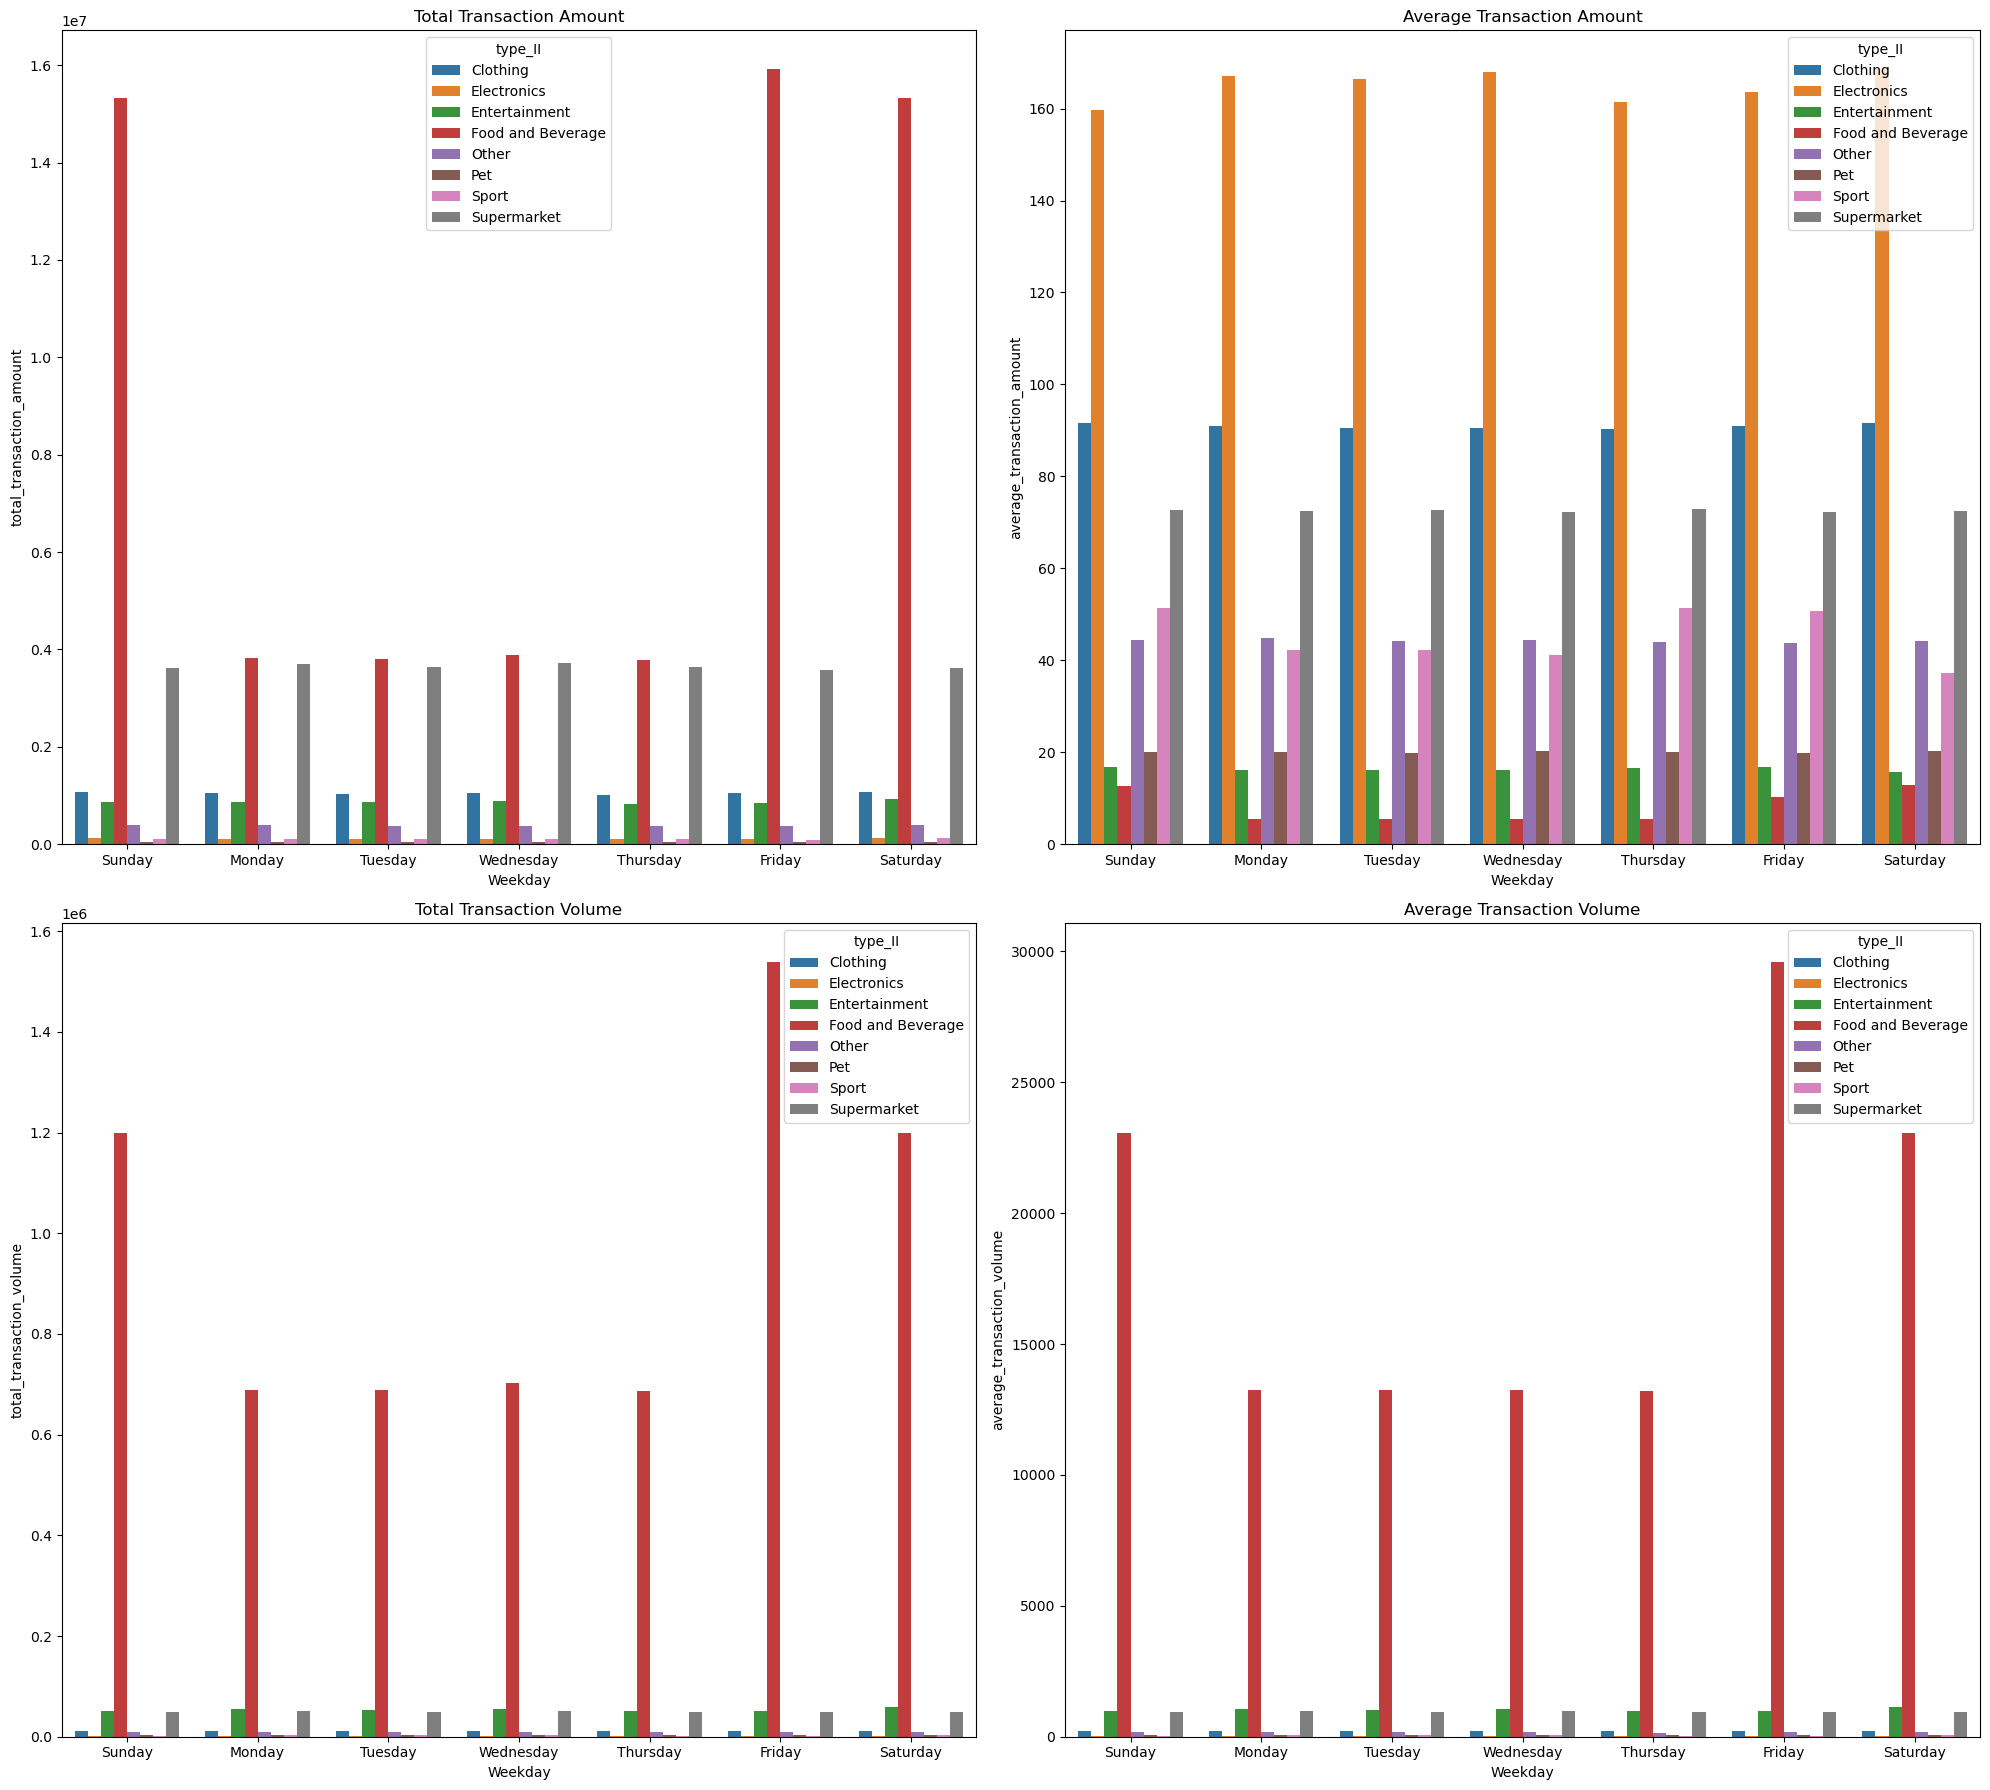

In [34]:
titles = ['total_transaction_amount','average_transaction_amount','total_transaction_volume', 'average_transaction_volume']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))
index = 0
for i in range(2):
    for j in range(2):
        sns.barplot(data=consumption_weekday_type_II.reset_index(), x='weekday', y=titles[index], hue='type_II',ax=axes[i,j])
        title = titles[index].replace('_', ' ').title()
        axes[i,j].set_title(title)
        axes[i,j].set_xlabel('Weekday')
        index += 1

plt.tight_layout()
plt.show()

According to the diagrams above, the `total transaction amount`, the `total transaction volume` and the `average transaction volume` of `Food and Beverage` is the highest on each weekday, and the consumption is concentrated on `Fridays`, `Saturdays`, and `Sundays`. However, `Electronics` has the highest `average_transaction_amount`, followed by `Clothing` and `Supermarket`.

# Further Analysis on `Food and Beverage`

In [35]:
start_date = datetime.date(2025, 1, 1)
end_date = datetime.date(2025, 12, 31)


day_count = {'Sunday': 0, 'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0}

current_date = start_date
while current_date <= end_date:
    day_of_week = current_date.strftime("%A")
    day_count[day_of_week] += 1
    current_date += datetime.timedelta(days=1)

In [36]:
consumption_food_weekday = consumption_weekday[consumption_weekday['type_II']=='Food and Beverage']
consumption_food_weekday = consumption_food_weekday.groupby(['weekday', 'type_I'])['money_amount'].agg(['sum', 'mean', 'std','max', 'min', 'count']).sort_values(by='weekday')
consumption_food_weekday = consumption_food_weekday.reset_index()
consumption_food_weekday['weekday_count'] = consumption_food_weekday['weekday'].apply(lambda x: day_count[x])
consumption_food_weekday['average_transaction_volume'] = consumption_food_weekday['count']/consumption_food_weekday['weekday_count']
consumption_food_weekday['average_transaction_volume'] = consumption_food_weekday['average_transaction_volume'].astype(int)
consumption_food_weekday.drop(['weekday_count'],axis=1,inplace=True)
consumption_food_weekday.rename(columns={
    'sum':'total_transaction_amount',
    'mean':'average_transaction_amount',
    'std':'std_transaction_amount',
    'max':'max_transaction_amount',
    'min':'min_transaction_amount',
    'count':'total_transaction_volume'
},inplace=True)
consumption_food_weekday = consumption_food_weekday.set_index(['weekday','type_I'])
consumption_food_weekday = consumption_food_weekday.sort_index()
display(consumption_food_weekday)

total_transaction_amount  average_transaction_amount  \
weekday   type_I                                                              
Sunday    Bar                       10328724.96                   12.012324   
          Coffee Shop                 373446.95                    2.845462   
          Food Retail                 904220.06                   23.114010   
          Restaurant                 3713101.89                   21.853731   
Monday    Bar                         740858.63                   12.367638   
          Coffee Shop                1200560.25                    2.453117   
          Food Retail                 877114.35                   22.841520   
          Restaurant                 1007580.52                    9.958199   
Tuesday   Bar                         756695.07                   12.412570   
          Coffee Shop                1203827.25                    2.455888   
          Food Retail                 841597.39                   22.860176   
          Restaurant                 1000767.31                    9.868235   
Wednesday Bar                         755616.10                   12.330751   
          Coffee Shop                1227226.10                    2.456717   
          Food Retail                 892658.19                   22.888085   
          Restaurant                 1014899.09                    9.916256   
Thursday  Bar                         739372.17                   12.247750   
          Coffee Shop                1199480.55                    2.454366   
          Food Retail                 848470.67                   22.879080   
          Restaurant                  999556.02                    9.896496   
Friday    Bar                       10151752.54                   12.025835   
          Coffee Shop                1176948.10                    2.451868   
          Food Retail                 892864.76                   23.085758   
          Restaurant                 3697280.91                   20.913524   
Saturday  Bar                       10320119.27                   12.011648   
          Coffee Shop                 373002.85                    2.837840   
          Food Retail                 899587.71                   23.090626   
          Restaurant                 3732801.12                   21.947196   

                       std_transaction_amount  max_transaction_amount  \
weekday   type_I                                                        
Sunday    Bar                        6.407887                    60.0   
          Coffee Shop                1.105748                     6.0   
          Food Retail               12.477841                    75.0   
          Restaurant                18.793357                    75.0   
Monday    Bar                        9.272028                    60.0   
          Coffee Shop                0.764505                     6.0   
          Food Retail               12.023330                    75.0   
          Restaurant                13.330219                    75.0   
Tuesday   Bar                        9.376527                    60.0   
          Coffee Shop                0.767155                     6.0   
          Food Retail               12.040546                    75.0   
          Restaurant                13.167361                    75.0   
Wednesday Bar                        9.265150                    60.0   
          Coffee Shop                0.770554                     6.0   
          Food Retail               12.018250                    75.0   
          Restaurant                13.249248                    75.0   
Thursday  Bar                        9.160958                    60.0   
          Coffee Shop                0.766453                     6.0   
          Food Retail               11.963516                    75.0   
          Restaurant                13.261826                    75.0   
Friday    Bar                        6.441021 

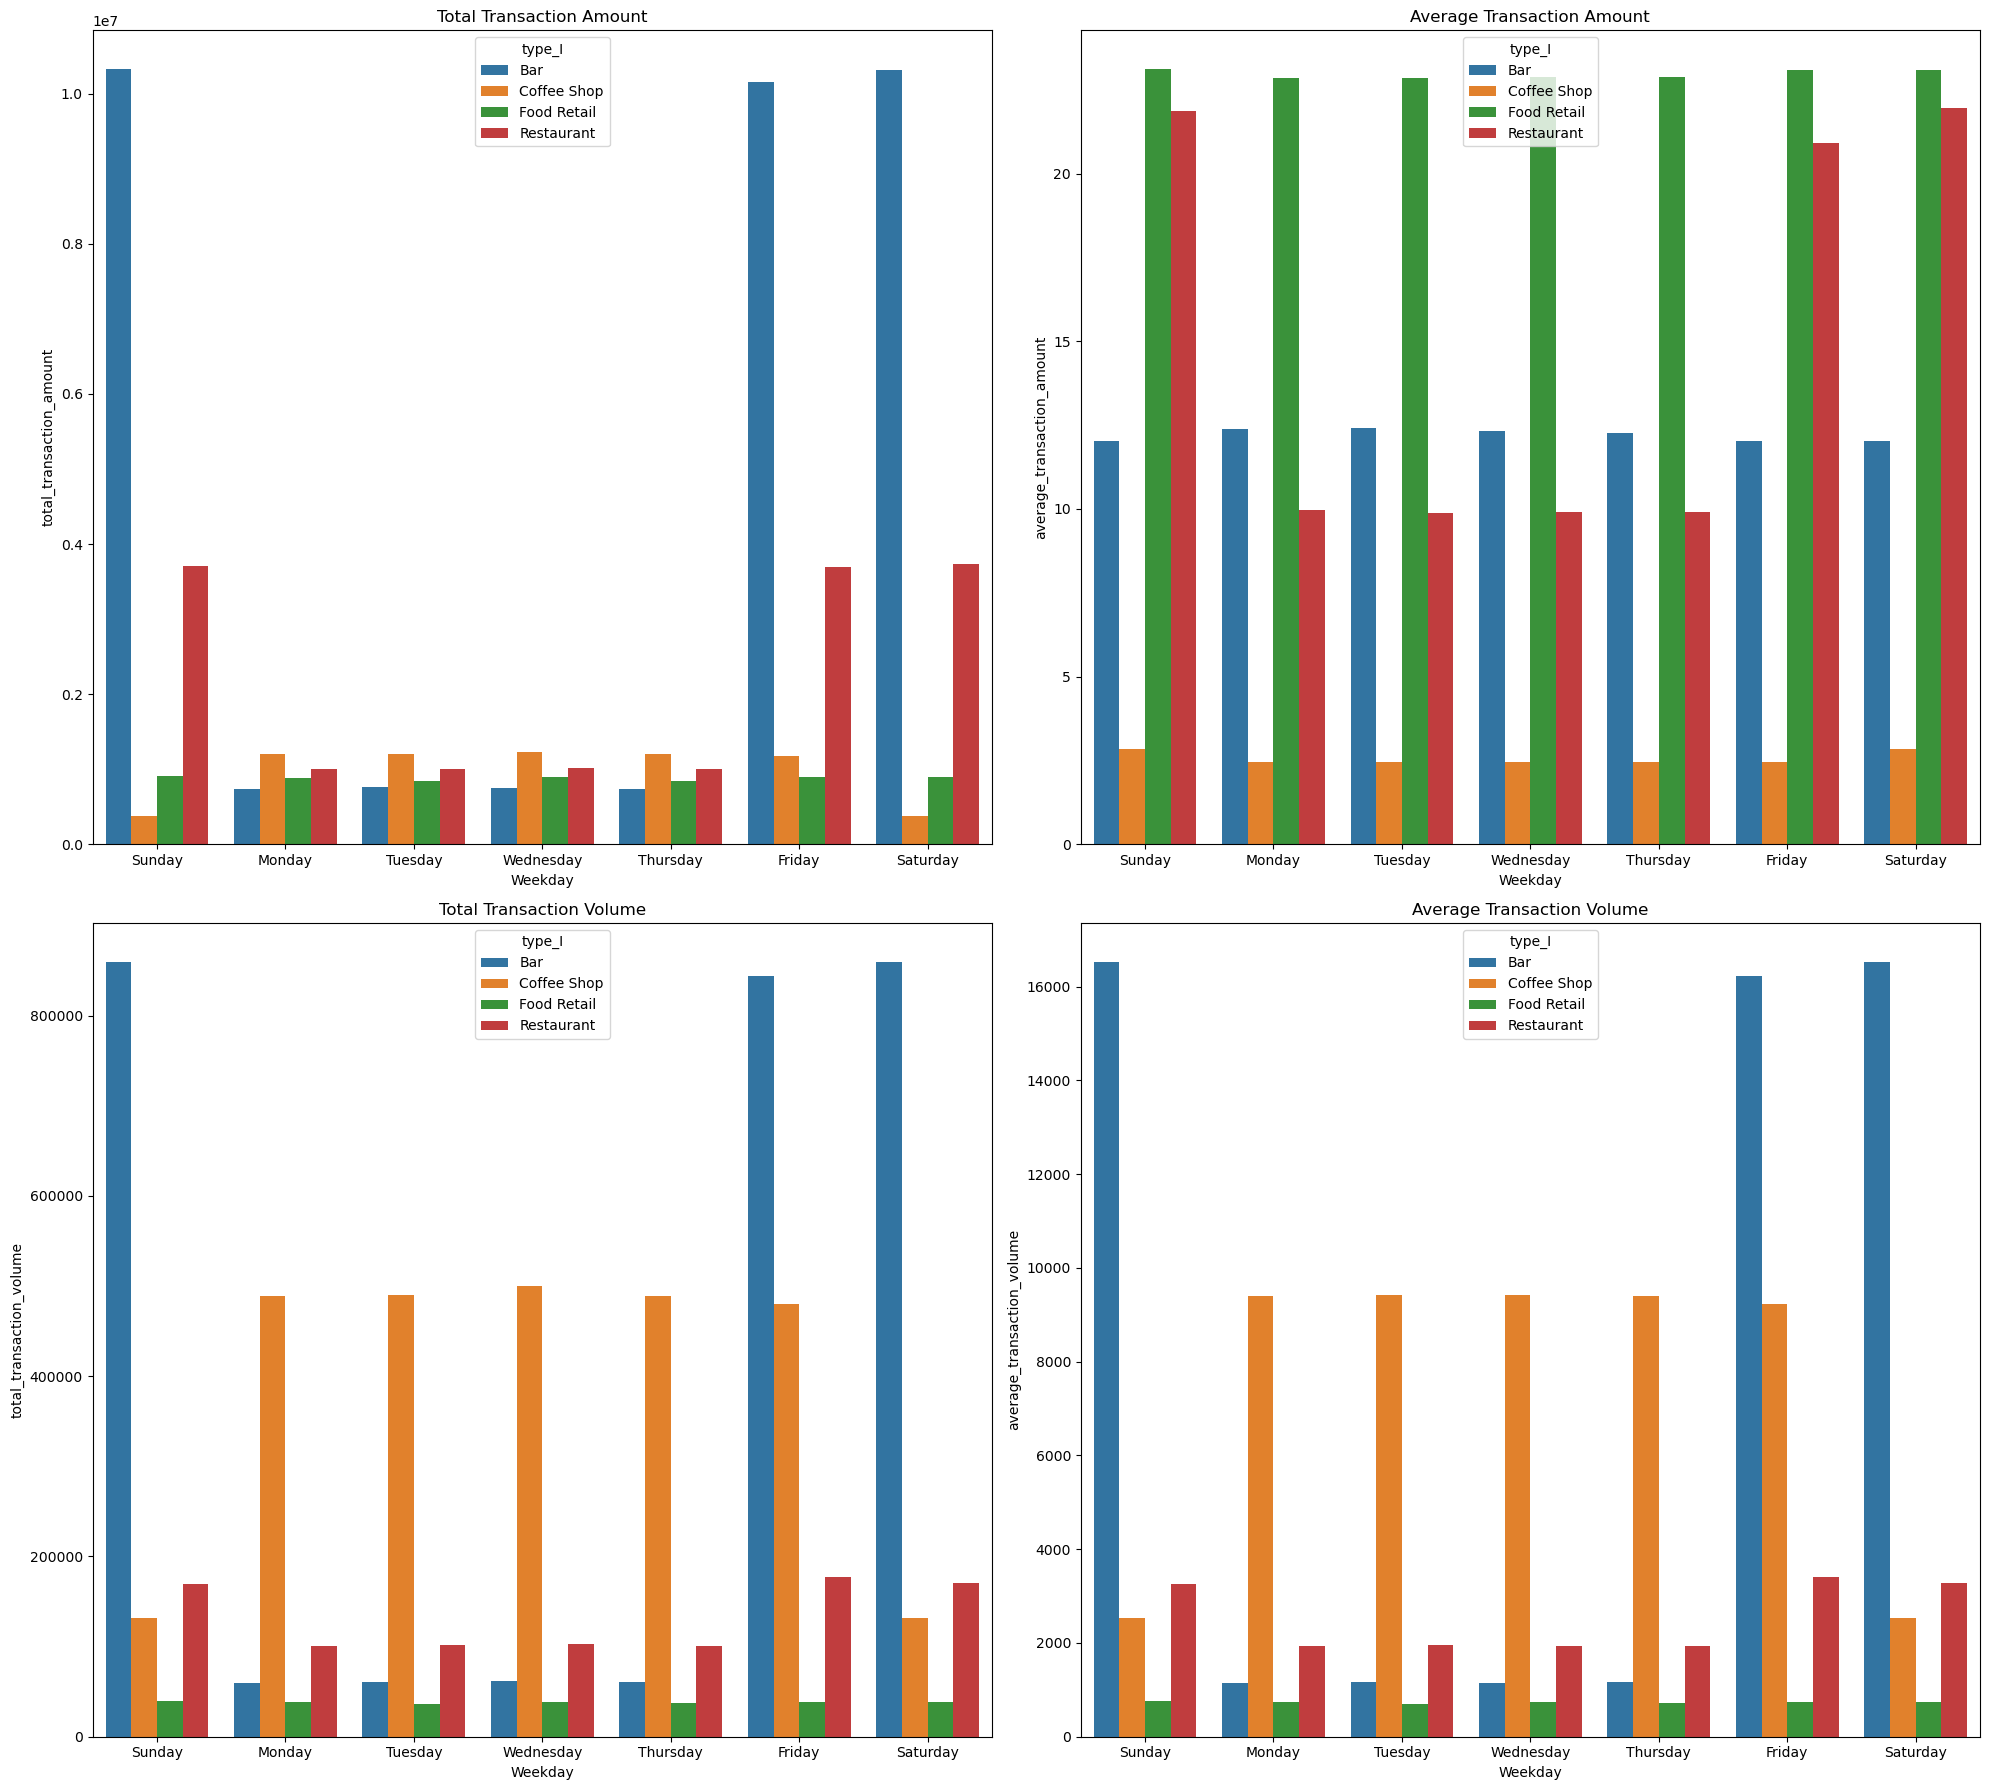

In [37]:
titles = ['total_transaction_amount','average_transaction_amount','total_transaction_volume', 'average_transaction_volume']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))
index = 0
for i in range(2):
    for j in range(2):
        sns.barplot(data=consumption_food_weekday.reset_index(), x='weekday', y=titles[index], hue='type_I',ax=axes[i,j])
        title = titles[index].replace('_', ' ').title()
        axes[i,j].set_title(title)
        axes[i,j].set_xlabel('Weekday')
        index += 1

plt.tight_layout()
plt.show()

According to the digrams above, the consumption of `Bar` is concentrated on and achieved highest `Total Transction Amount` on `Fridays`, `Saturdays`, and `Sundays`. However, `Food Retail` has the highest `Average Transction Amount` on each weekday.

# 3. Month Analysis

In [38]:
consumption_month = consumption.loc[:,['money_amount','to_account','type_I','type_II','month']]
consumption_month['month'] = consumption_month['month'].apply(lambda x: x[:3])
consumption_month['month'] = consumption_month['month'].astype('category')
reorder_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
consumption_month['month'] = consumption_month['month'].cat.reorder_categories(reorder_list)

In [39]:
day_count = {
    'Jan':31,
    'Feb':28,
    'Mar': 31,
    'Apr': 30,
    'May': 31,
    'Jun': 30,
    'Jul': 31,
    'Aug': 31,
    'Sep': 30,
    'Oct': 31,
    'Nov': 30,
    'Dec':31
}

In [40]:
consumption_month_type_II = consumption_month.groupby(['month', 'type_II'])['money_amount'].agg(['sum', 'mean', 'std','max', 'min', 'count']).sort_values(by='month')
consumption_month_type_II = consumption_month_type_II.reset_index()
consumption_month_type_II['month_count'] = consumption_month_type_II['month'].apply(lambda x: day_count[x])
consumption_month_type_II['average_transaction_volume'] = consumption_month_type_II['count']/consumption_month_type_II['month_count']
consumption_month_type_II['average_transaction_volume'] = consumption_month_type_II['average_transaction_volume'].astype(int)
consumption_month_type_II.drop(['month_count'],axis=1,inplace=True)
consumption_month_type_II.rename(columns={
    'sum':'total_transaction_amount',
    'mean':'average_transaction_amount',
    'std':'std_transaction_amount',
    'max':'max_transaction_amount',
    'min':'min_transaction_amount',
    'count':'total_transaction_volume'
},inplace=True)
consumption_month_type_II = consumption_month_type_II.set_index(['month','type_II'])
consumption_month_type_II = consumption_month_type_II.sort_index()
display(consumption_month_type_II)

total_transaction_amount  average_transaction_amount  \
month type_II                                                                   
Jan   Clothing                          572138.00                   90.628544   
      Electronics                        51089.00                  155.285714   
      Entertainment                     481085.13                   16.058117   
      Food and Beverage                5101949.74                    8.959670   
      Other                             204876.00                   44.316677   
...                                           ...                         ...   
Dec   Food and Beverage                6118999.69                   10.263902   
      Other                             443398.00                   43.866047   
      Pet                                66773.00                   20.685564   
      Sport                             126059.00                   54.736865   
      Supermarket                      2344828.30                   74.168221   

                         std_transaction_amount  max_transaction_amount  \
month type_II                                                             
Jan   Clothing                        52.039872                  200.00   
      Electronics                     75.666734                  299.00   
      Entertainment                   17.892167                  100.00   
      Food and Beverage                9.934084                   74.99   
      Other                           27.495731                  100.00   
...                                         ...                     ...   
Dec   Food and Beverage               11.806546                   75.00   
      Other                           27.239449                  100.00   
      Pet                             17.110026                   60.00   
      Sport                           33.528613                  120.00   
      Supermarket                     46.528513                  200.00   

                         min_transaction_amount  total_transaction_volume  \
month type_II                                                               
Jan   Clothing                             5.00                      6313   
      Electronics                         30.00                       329   
      Entertainment                        2.00                     29959   
      Food and Beverage                    1.45                    569435   
      Other                                5.00                      4623   
...                                         ...                       ...   
Dec   Food and Beverage                    1.45                    596167   
      Other                                5.00                     10108   
      Pet                                  2.00                      3228   
      Sport                               20.00                      2303   
      Supermarket                          5.00                     31615   

                         average_transaction_volume  
month type_II                                        
Jan   Clothing                                  203  
      Electronics                                10  
      Entertainment                             966  
      Food and Beverage                       18368  
      Other                                     149  
...                                             ...  
Dec   Food and Beverage                       19231  
      Other                                     326  
      Pet                                       104  
      Sport                                      74  
      Supermarket                              1019  

[96 rows x 7 columns]

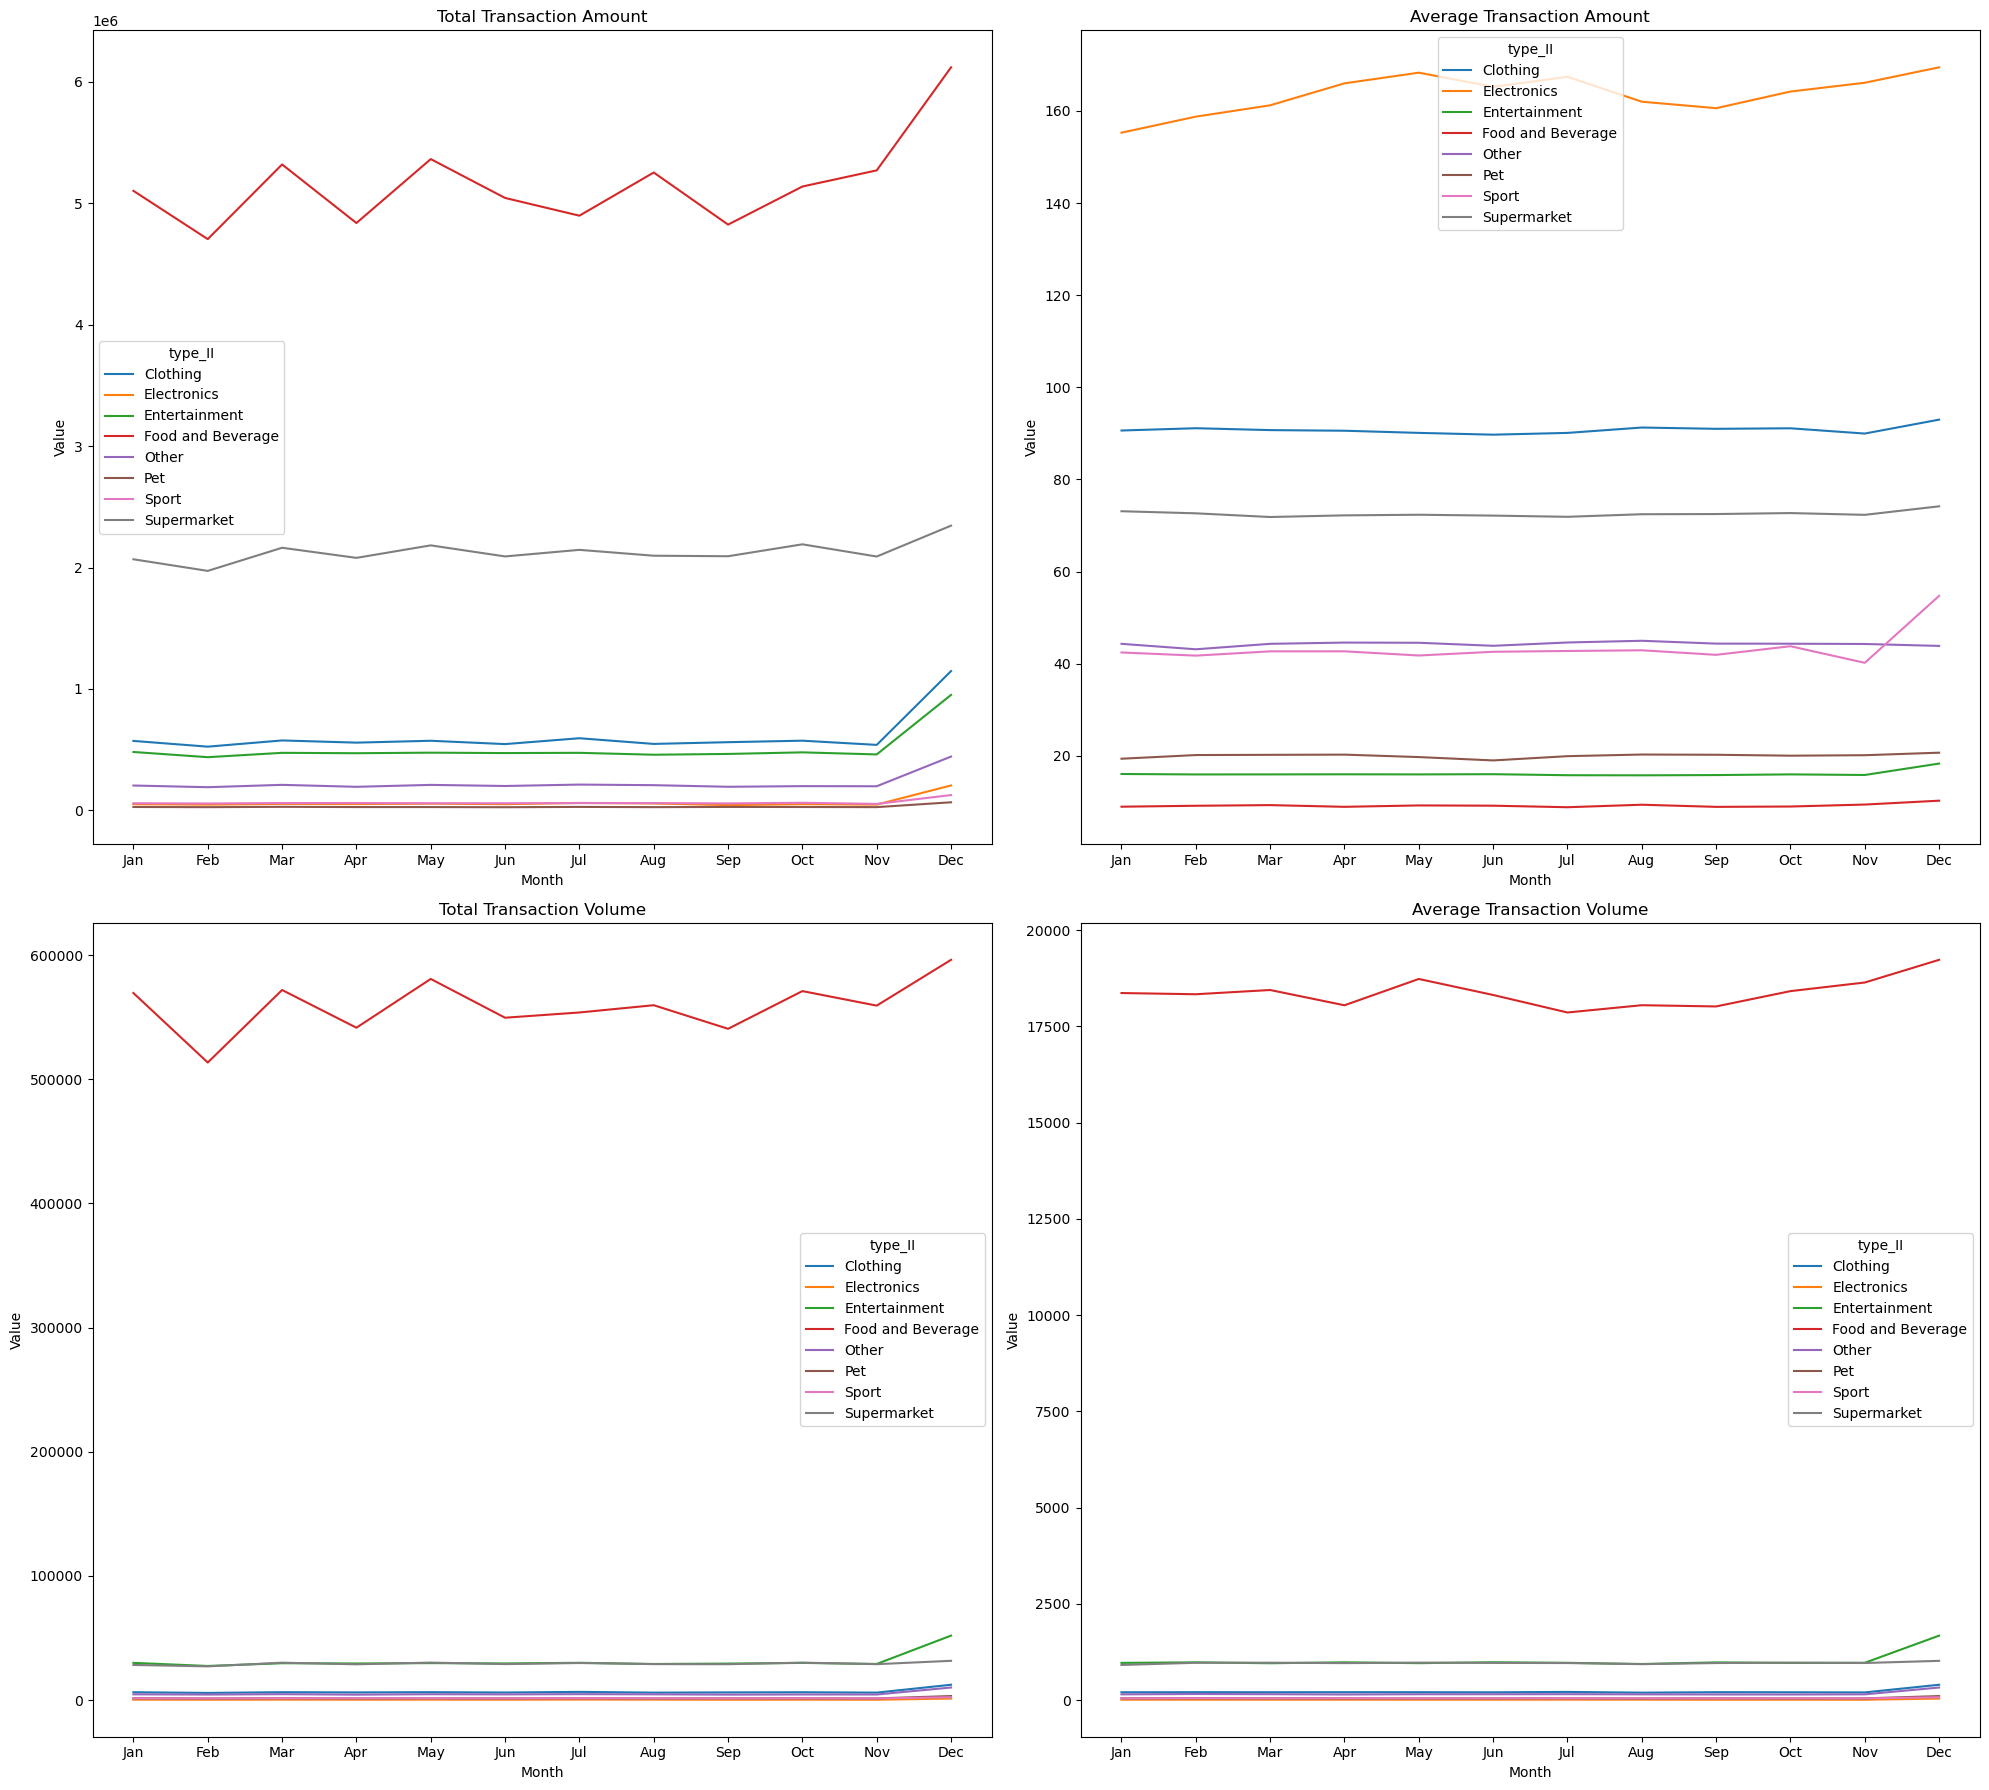

In [41]:
titles = ['total_transaction_amount','average_transaction_amount','total_transaction_volume', 'average_transaction_volume']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))
index = 0
for i in range(2):
    for j in range(2):
        sns.lineplot(data=consumption_month_type_II.reset_index(), x='month', y=titles[index], hue='type_II',ax=axes[i,j])
        title = titles[index].replace('_', ' ').title()
        axes[i,j].set_title(title)
        axes[i,j].set_xlabel('Month')
        axes[i,j].set_ylabel('Value')
        index += 1

plt.tight_layout()
plt.show()

According to the line charts above, expect `Food and Beverage`, the remaining types don't change sharply. And in Decembers, almost all experience an increase.

https://www.lloydsbank.com/online-banking/profile-and-settings/everyday-offers/faqs.html